In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import imutils # A simple image utility library. https://github.com/jrosebr1/imutils
import cv2 # opencv library
import os
import os

path = "./Data Citra Makanan Betawi-20181128"
dirs = os.listdir(path)
imagePaths = []
for dir_name in dirs:
    print("[INFO] describing images...")
    imagePaths += list(paths.list_images(path+"/"+dir_name))
    print(len(imagePaths))
    print(imagePaths[0])
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
labels = []
print("Imports done")

[INFO] describing images...
100
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
200
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
300
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
300
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
400
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
500
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
600
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
700
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
800
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
900
./Data Citra Makanan Betawi-20181128/bubur_ayam\bubur_001.jpg
[INFO] describing images...
1000
./Data Citra Makanan Betawi

In [22]:
def image_to_feature_vector(image, size=(96, 96)):
# resize the image to a fixed size, then flatten the image into
# a list of raw pixel intensities
    return cv2.resize(image, size).flatten()
print("Function defined")

Function defined


In [23]:
unreadable_image = []
# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label (assuming that our
    # path as the format: /path/to/dataset/{class}.{image_num}.jpg
    image = cv2.imread(imagePath)
    if image is None:
        unreadable_image.append(imagePath)
        continue
    label = imagePath.split(os.path.sep)[0].split("/")[2]
 
    # extract raw pixel intensity "features", followed by a color
    # histogram to characterize the color distribution of the pixels
    # in the image
    pixels = image_to_feature_vector(image)
    

    # update the raw images, features, and labels matricies,
    # respectively
    rawImages.append(pixels)
    labels.append(label)
    
    # show an update every 1,000 images
    if i > 0 and i % 1000 == 0:
        print("[INFO] Processed {}/{}".format(i, len(imagePaths)))
        
print("All images processed")

[INFO] Processed 1000/1100
All images processed


In [24]:
print("Unreadable images :")
unreadable_image

Unreadable images :


['./Data Citra Makanan Betawi-20181128/kerak_telor\\Kerak_Telor_11.jpg',
 './Data Citra Makanan Betawi-20181128/ketoprak\\ketoprak_033.jpg']

In [25]:
# show some information on the memory consumed by the raw images
# matrix and features matrix
rawImages = np.array(rawImages)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 29.65MB


In [37]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

In [79]:
X = StandardScaler().fit_transform(rawImages)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift()
two_means = cluster.MiniBatchKMeans()
ward = cluster.AgglomerativeClustering()
spectral = cluster.SpectralClustering()
dbscan = cluster.DBSCAN()
affinity_propagation = cluster.AffinityPropagation()
average_linkage = cluster.AgglomerativeClustering()
birch = cluster.Birch()
gmm = mixture.GaussianMixture()
kmeans = cluster.KMeans(n_clusters=11)

C:\Users\hppro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [80]:
# KMeans
y_predict = kmeans.fit_predict(X, labels)
y_predict

array([9, 4, 8, ..., 4, 8, 5])

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

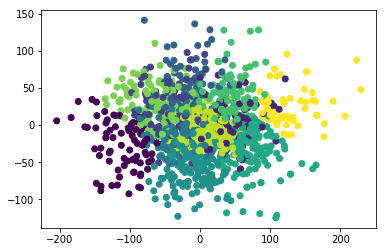

In [82]:
import matplotlib.pyplot as plt

# Clustering menggunakan library
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_predict)
plt.show()

In [83]:
y_predict = gmm.fit_predict(X, labels)
y_predict

AttributeError: 'GaussianMixture' object has no attribute 'fit_predict'